In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.io import wavfile
from fingerprint import *

In [2]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in xrange(0, len(l), n):
        yield l[i:i+n]

In [3]:
_, record = wavfile.read("contains_example.wav")
_, example = wavfile.read("cutted_example.wav")
record = record[:, 0]
example_hash = set(x[0] for x in fingerprint(example))
record_hash = set(x[0] for x in fingerprint(record))

In [10]:
%time
t = time()
density = np.array([len(example_hash.intersection(set(x[0] for x in fingerprint(chunk)))) 
           for chunk in chunks(record, 2048)])

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 6.91 µs


### The dencity one cell is equal to 1/30 sec. So density with length 30 codes 1 second wav file

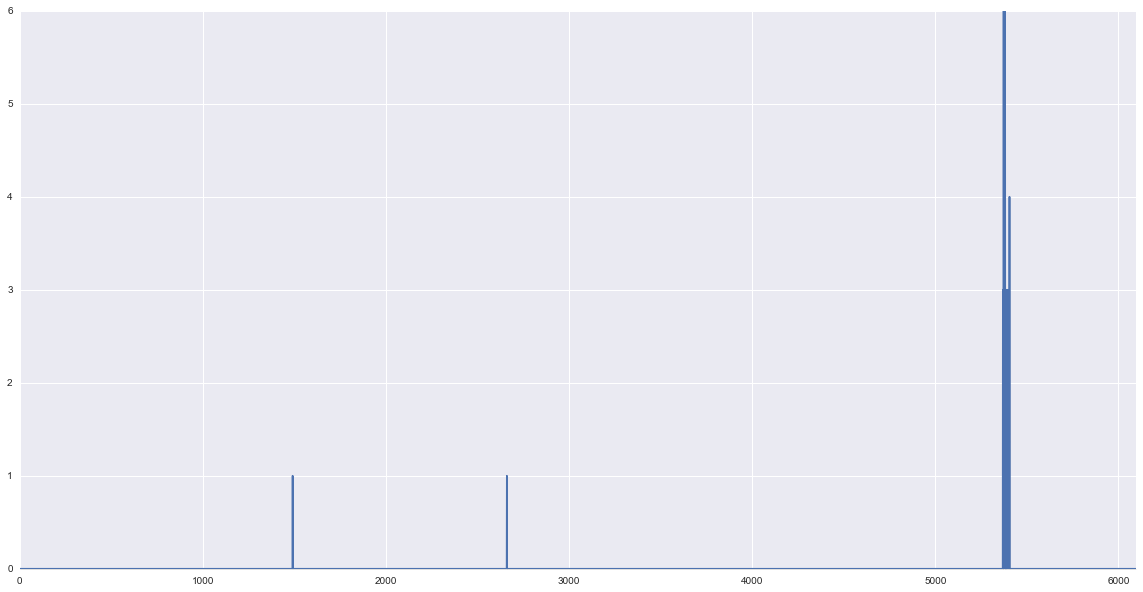

In [5]:
f, ax = plt.subplots(figsize=(20,10))
sns.tsplot(density)

In [12]:
density = np.array(density)

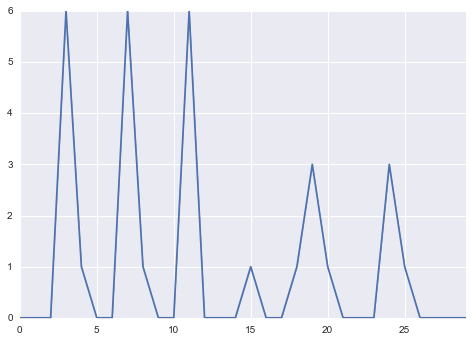

In [31]:
sns.tsplot(density[5370:5400])